In [2]:
# import necessary libraries to start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# import data (exported from 1_putting_data_together.ipynb)
data = pd.read_csv('nyc_high_schools_complete_20160229.csv', index_col=0)
data.head()

,% Female,% Male,% Poverty,2015_avg_home_value_sqft,Administrative District Code,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Average Score Regents Algebra,Average Score Regents Algebra 2/Trig,Average Score Regents Chemistry,...,Student Attendance Rate,Supportive Environment - Percent Positive,Teacher Attendance Rate,Vocational Program (6 months),Years of principal experience at this school,Zip,dropouts_percent,end_time,school_type,start_time
DBN,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,1,2.18,2.06,64,NaN,NaN,...,0.766,0.77,0.971,0,3.0,10002,0.095890,3:30 PM,NaN,8:30 AM
1501M448,0.378289,0.621711,0.891447,1321.166667,1,2.27,2.37,64,62,61,...,0.880,0.87,0.971,0,5.5,10002,0.097561,3:15 PM,NaN,8:15 AM
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.66,2.63,NaN,NaN,NaN,...,0.938,0.92,0.961,0,13.8,10009,0.034091,3:30 PM,Consortium School,8:30 AM
1501M509,0.567493,0.432507,0.845730,1321.166667,1,2.28,2.09,61,74,73,...,0.768,0.81,0.971,0,1.9,10002,0.176471,3:30 PM,NaN,8:00 AM
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.50,3.53,80,80,80,...,0.952,0.85,0.967,0,9.0,10002,0.008197,4:00 PM,NaN,8:15 AM


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 1501M292 to 1484X703
Data columns (total 55 columns):
% Female                                                          956 non-null float64
% Male                                                            956 non-null float64
% Poverty                                                         956 non-null float64
2015_avg_home_value_sqft                                          560 non-null float64
Administrative District Code                                      863 non-null float64
Average Grade 8 English Proficiency                               969 non-null float64
Average Grade 8 Math Proficiency                                  969 non-null float64
Average Score Regents Algebra                                     897 non-null float64
Average Score Regents Algebra 2/Trig                              610 non-null float64
Average Score Regents Chemistry                                   533 non-null float64
Average Score Rege

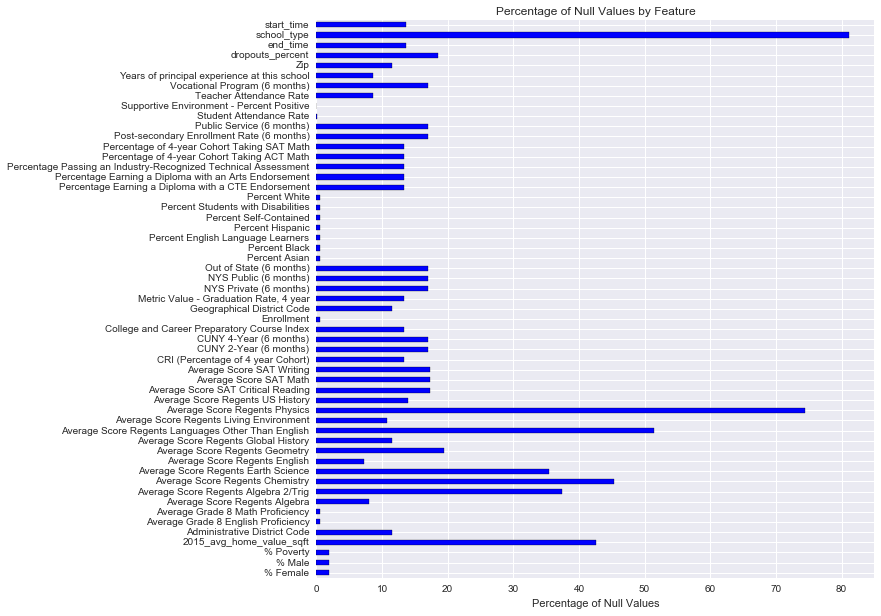

In [5]:
# view missing values
length = len(data)
missing = (data.isnull().sum() * 1.0 / length) * 100
missing.plot(kind='barh', xlim=(0,85), figsize=(10,10),)
plt.title('Percentage of Null Values by Feature')
plt.xlabel('Percentage of Null Values');

In [6]:
# tackle missing values that are greater than 50% first by dropping them
data = data.drop(['school_type', 'Average Score Regents Physics', 'Average Score Regents Languages Other Than English'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 1501M292 to 1484X703
Data columns (total 52 columns):
% Female                                                          956 non-null float64
% Male                                                            956 non-null float64
% Poverty                                                         956 non-null float64
2015_avg_home_value_sqft                                          560 non-null float64
Administrative District Code                                      863 non-null float64
Average Grade 8 English Proficiency                               969 non-null float64
Average Grade 8 Math Proficiency                                  969 non-null float64
Average Score Regents Algebra                                     897 non-null float64
Average Score Regents Algebra 2/Trig                              610 non-null float64
Average Score Regents Chemistry                                   533 non-null float64
Average Score Rege

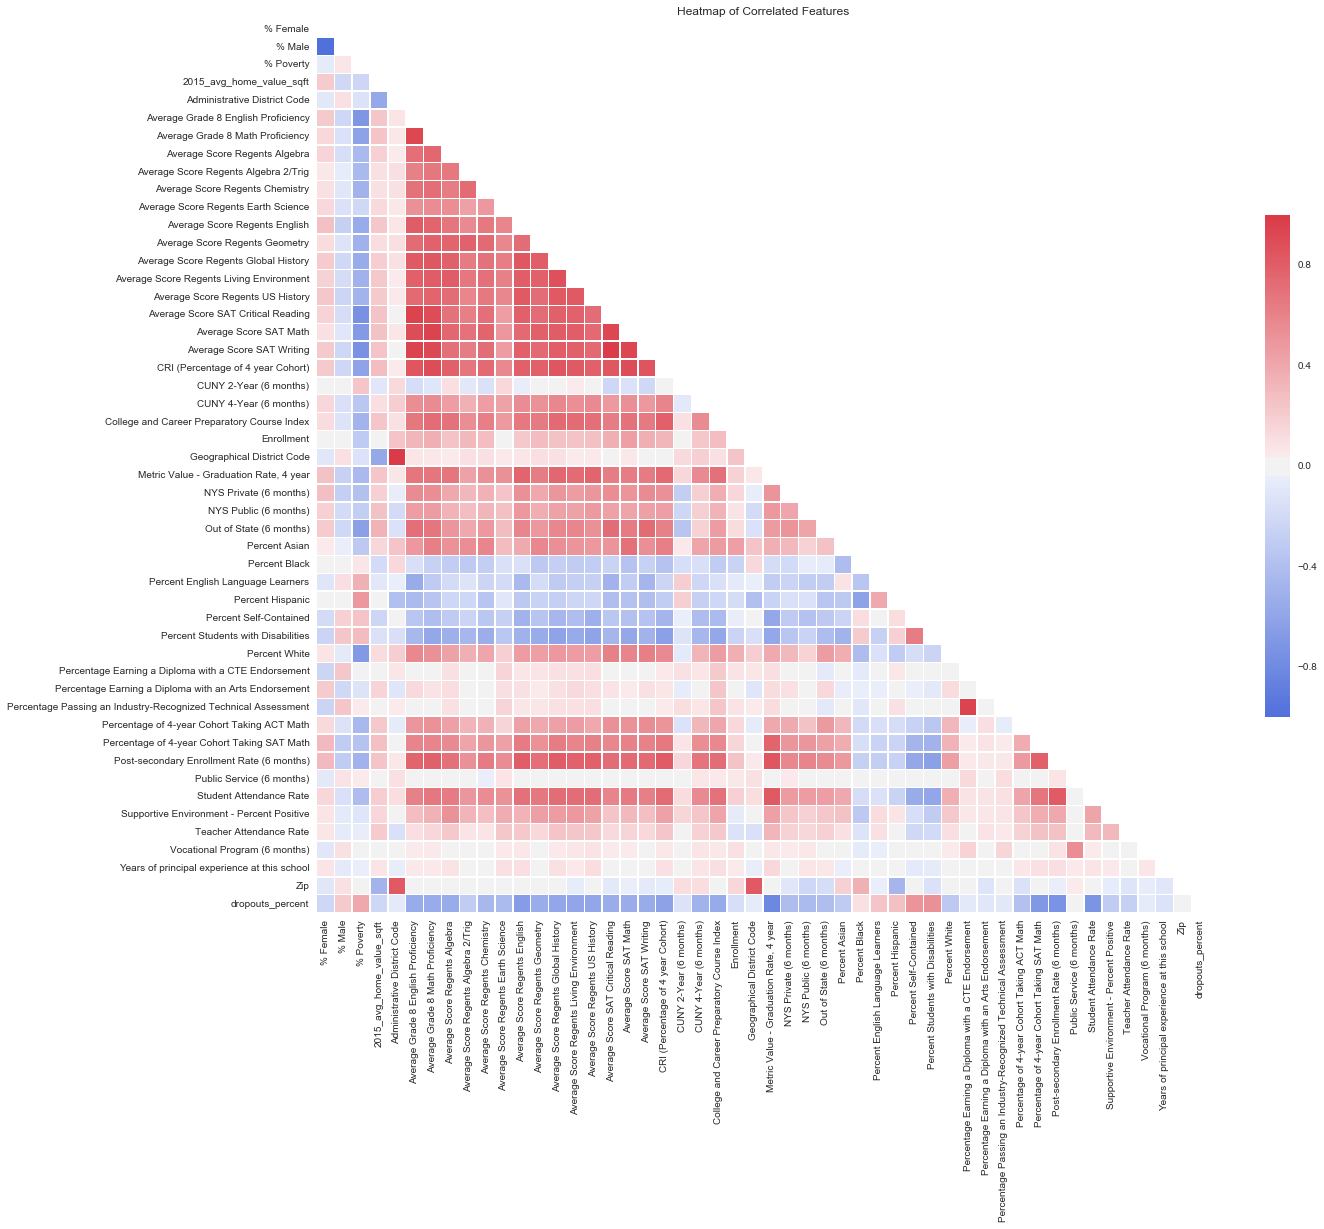

In [8]:
# look at correlated features to see if I can drop any (before I impute any missing values)
# create correlation heatmap - modified from https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.title('Heatmap of Correlated Features')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [9]:
# I will remove 'Geographical District Code' since I have 'Zip' and it is highly correlated with 'Zip' and 'Administrative District Code'
data = data.drop('Geographical District Code', axis=1)

In [10]:
# Many of the Regents exams are highly correlated and also are missing a ton of values
# I'm going to keep the top four Regents with the most values (coincidentally, across four different subjects)
# English, Algebra, Living Environments, Global History
data = data.drop(['Average Score Regents Algebra 2/Trig', 'Average Score Regents Chemistry',
                  'Average Score Regents Earth Science', 'Average Score Regents Geometry',
                 'Average Score Regents US History'], axis=1)

In [11]:
# percentage earning cte (career and technical endorsement) versus industry-recognized assesment are highly correlated
# cte is more flexible and therefore I will keep that credential
data = data.drop('Percentage Passing an Industry-Recognized Technical Assessment', axis=1)

In [12]:
# create a length of day feature
data['start_time'].head()

DBN
1501M292    8:30 AM
1501M448    8:15 AM
1501M450    8:30 AM
1501M509    8:00 AM
1501M539    8:15 AM
Name: start_time, dtype: object

In [13]:
data.loc[:, 'start_time'] = data['start_time'].str[0:-3]
data['start_time'].head()

DBN
1501M292    8:30
1501M448    8:15
1501M450    8:30
1501M509    8:00
1501M539    8:15
Name: start_time, dtype: object

In [14]:
format = '%H:%M'
data['start_time'] = pd.to_datetime(data['start_time'], format=format)

In [15]:
# checking that all of the rows in 'end_time' contain 'PM'
(data['end_time']=='AM').any()

False

In [16]:
data.loc[:, 'end_time'] = data['end_time'].str[0:-3]

In [17]:
format = '%H:%M'
data['end_time'] = pd.to_datetime(data['end_time'], format=format)

In [18]:
data['end_time'] = pd.Timedelta(hours=12) + data['end_time']

In [19]:
data['school_day_length'] = data['end_time'] - data['start_time']

In [20]:
time = pd.DatetimeIndex(data['school_day_length'])
time = time.hour * 60 + time.minute

In [21]:
data['school_day_length'] = time
data['school_day_length'].head()

DBN
1501M292    420
1501M448    420
1501M450    420
1501M509    450
1501M539    465
Name: school_day_length, dtype: float64

In [22]:
# Now I can drop start_time and end_time since I have school_day_length
data = data.drop(['start_time', 'end_time'], axis=1)

In [23]:
datac = data.copy()

In [24]:
# impute missing values with feature median
for x in data.columns:
    data[x].fillna((data[x].median()), inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 1501M292 to 1484X703
Data columns (total 44 columns):
% Female                                                 975 non-null float64
% Male                                                   975 non-null float64
% Poverty                                                975 non-null float64
2015_avg_home_value_sqft                                 975 non-null float64
Administrative District Code                             975 non-null float64
Average Grade 8 English Proficiency                      975 non-null float64
Average Grade 8 Math Proficiency                         975 non-null float64
Average Score Regents Algebra                            975 non-null float64
Average Score Regents English                            975 non-null float64
Average Score Regents Global History                     975 non-null float64
Average Score Regents Living Environment                 975 non-null float64
Average Score SAT Critical Rea

In [26]:
data.describe()

,% Female,% Male,% Poverty,2015_avg_home_value_sqft,Administrative District Code,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Average Score Regents Algebra,Average Score Regents English,Average Score Regents Global History,...,Post-secondary Enrollment Rate (6 months),Public Service (6 months),Student Attendance Rate,Supportive Environment - Percent Positive,Teacher Attendance Rate,Vocational Program (6 months),Years of principal experience at this school,Zip,dropouts_percent,school_day_length
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,...,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,0.491780,0.508215,0.806972,478.612137,13.823590,2.426923,2.346013,66.245128,71.905641,65.272821,...,0.536442,0.000273,0.869470,0.841588,0.965518,0.000069,4.882359,10700.038974,0.088694,421.841026
std,0.139324,0.139321,0.156481,316.081895,8.747758,0.380232,0.389465,6.185564,7.484366,9.368753,...,0.187358,0.002633,0.064332,0.057396,0.010711,0.000816,3.454512,511.667942,0.074756,28.397811
min,0.000000,0.000000,0.141361,154.416667,1.000000,1.698000,1.860000,52.000000,48.000000,42.000000,...,0.000000,0.000000,0.610000,0.610000,0.883000,0.000000,0.100000,10002.000000,0.000000,355.000000
25%,0.435556,0.453335,0.744794,348.416667,8.000000,2.210000,2.095054,62.000000,67.000000,58.000000,...,0.406500,0.000000,0.826000,0.801000,0.960000,0.000000,2.300000,10451.000000,0.037826,405.000000
50%,0.490625,0.509375,0.829295,391.916667,12.000000,2.340000,2.220000,65.000000,71.000000,64.000000,...,0.514000,0.000000,0.878000,0.840000,0.966000,0.000000,3.900000,10472.000000,0.075228,420.000000
75%,0.546665,0.564444,0.908691,444.083333,20.000000,2.562491,2.459429,69.000000,76.000000,70.000000,...,0.656500,0.000000,0.919000,0.880000,0.972000,0.000000,7.000000,11214.000000,0.115164,435.000000
max,1.000000,1.000000,1.000000,1861.250000,32.000000,4.010000,4.170000,94.000000,96.000000,96.000000,...,1.000000,0.045000,0.984000,1.000000,0.995000,0.014000,22.800000,11694.000000,0.500000,540.000000


In [27]:
# check for feature variance
data.var().sort_values()

Vocational Program (6 months)                            6.657042e-07
Public Service (6 months)                                6.933706e-06
Teacher Attendance Rate                                  1.147325e-04
Percent Self-Contained                                   3.153054e-03
Supportive Environment - Percent Positive                3.294271e-03
NYS Private (6 months)                                   3.639834e-03
NYS Public (6 months)                                    3.762726e-03
Out of State (6 months)                                  4.029853e-03
Student Attendance Rate                                  4.138644e-03
dropouts_percent                                         5.588477e-03
Percent Students with Disabilities                       7.252981e-03
CUNY 2-Year (6 months)                                   7.990578e-03
CUNY 4-Year (6 months)                                   9.872162e-03
Percentage Earning a Diploma with a CTE Endorsement      1.334358e-02
Percent White       

In [28]:
# Based on the above, will remove extremely low variance features (they do not contain much information)
data = data.drop(['Vocational Program (6 months)', 'Public Service (6 months)'], axis=1)

In [29]:
# create an 'sat_overall' feature to capture SAT scores
data['sat_score_overall'] = data['Average Score SAT Critical Reading'] + data['Average Score SAT Math'] + data['Average Score SAT Writing']

In [30]:
# create a 'regents_overall' feature to capture Regents scores
data['regents_score_overall'] = data['Average Score Regents Algebra'] + data['Average Score Regents English'] + data['Average Score Regents Living Environment'] + data['Average Score Regents Global History']

In [31]:
# create a diversity feature from sum of squares // 1 = least diverse and .25 = most diverse
data['population_diversity'] = (data['Percent Black']**2 + data['Percent White']**2 + data['Percent Hispanic']**2 + data['Percent Asian']**2)

In [32]:
# create a grade 8 score rating
data['grade8_proficiency'] = data['Average Grade 8 English Proficiency'] + data['Average Grade 8 Math Proficiency']

In [33]:
# I have some categorical data that needs to be labeled as such
data['Zip'] = data['Zip'].astype('category')

In [34]:
data['Zip'].value_counts()

10472    124
10457     26
11101     24
10002     22
10019     22
10456     22
11201     20
10468     20
10451     18
10458     18
10473     18
10011     16
11203     16
11432     16
11208     15
11236     14
10003     14
11214     14
11211     14
10023     14
10463     14
11207     12
10467     12
10460     12
11206     12
10461     12
10029     12
11225     12
11411     11
11226     10
        ... 
11103      2
11223      2
11374      2
10009      2
11220      2
11216      2
11385      2
10033      2
11102      2
10312      2
11238      2
11358      2
11423      2
11426      2
11361      2
10453      2
10452      2
11364      2
11232      2
11218      2
10302      2
11418      2
10282      2
10128      2
11412      2
11365      2
10039      2
11419      1
11420      1
10034      1
dtype: int64

In [35]:
data['Administrative District Code'] = data['Administrative District Code'].astype('category')

In [36]:
# looks like it would be easier to use Administrative District codes as dummy variables, although zip could be interesting for explanations
data['Administrative District Code'].value_counts()

12    144
2     116
10     54
9      46
8      38
17     34
11     34
7      32
28     30
24     30
14     30
19     27
13     26
3      26
27     26
29     25
18     22
21     22
15     22
5      20
31     20
25     20
30     20
6      19
4      14
32     14
1      12
22     12
26     11
16     11
20     10
23      8
dtype: int64

In [37]:
# rename columns to tidier names
data = data.rename(columns=({ 'Teacher Attendance Rate' : 'teacher_attendance', 'Percent Self-Contained': 'self-contained_percent',
                            'Supportive Environment - Percent Positive' : 'school_environment_survey', 'NYS Private (6 months)': 'college_nys_private',
                            'NYS Public (6 months)' : 'college_nys_public', 'Out of State (6 months)': 'college_out_of_state',
                            'Student Attendance Rate' : 'student_attendance_rate', 'Percent Students with Disabilities': 'disability_percent',
                            'CUNY 2-Year (6 months)' : 'cuny_2yr', 'CUNY 4-Year (6 months)': 'cuny_4yr',
                            'Percentage Earning a Diploma with a CTE Endorsement' : 'cte_percent', 'Percent White': 'white_percent',
                            'Percentage of 4-year Cohort Taking ACT Math' : 'act_percent_took_exam', 'Percentage Earning a Diploma with an Arts Endorsement': 'arts_percent',
                            'Percent Asian' : 'asian_percent', '% Male': 'male_percent',
                            '% Female' : 'female_percent', '% Poverty': 'poverty_percent',
                            'Metric Value - Graduation Rate, 4 year' : 'graduation_rate', 'Percent English Language Learners': 'ell_percent',
                            'Post-secondary Enrollment Rate (6 months)' : 'post-secondary_enroll_rate', 'Percentage of 4-year Cohort Taking SAT Math': 'sat_percent_took_exam',
                            'CRI (Percentage of 4 year Cohort)' : 'college_readiness_index', 'Percent Hispanic': 'hispanic_percent',
                            'Percent Black' : 'percent_black', 'College and Career Preparatory Course Index': 'college_career_readiness_index',
                            'Average Grade 8 English Proficiency' : 'grade8_english', 'Average Grade 8 Math Proficiency': 'grade8_math',
                            'Years of principal experience at this school' : 'principal_year_exp', 'Average Score Regents Algebra': 'regents_algebra',
                            'Average Score Regents English' : 'regents_english', 'Average Score Regents Living Environment': 'regents_living_environ',
                            'Administrative District Code' : 'district_admin_code', 'Average Score Regents Global History': 'regents_history_global',
                            'Average Score SAT Critical Reading' : 'sat_reading', 'Average Score SAT Writing': 'sat_writing',
                            'Average Score SAT Math' : 'sat_math', 'Zip': 'zip_code',
                            'Enrollment' : 'enrollment', '2015_avg_home_value_sqft': 'avg_home_value_sqft'}))

data.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,...,school_environment_survey,teacher_attendance,principal_year_exp,zip_code,dropouts_percent,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency
DBN,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,1,2.18,2.06,64,66,53,...,0.77,0.971,3.0,10002,0.095890,420,1197,238,0.398837,4.24
1501M448,0.378289,0.621711,0.891447,1321.166667,1,2.27,2.37,64,69,67,...,0.87,0.971,5.5,10002,0.097561,420,1144,268,0.321911,4.64
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.66,2.63,65,75,64,...,0.92,0.961,13.8,10009,0.034091,420,1327,271,0.399807,5.29
1501M509,0.567493,0.432507,0.845730,1321.166667,1,2.28,2.09,61,69,63,...,0.81,0.971,1.9,10002,0.176471,450,1245,257,0.425334,4.37
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.50,3.53,80,91,87,...,0.85,0.967,9.0,10002,0.008197,465,1859,346,0.280110,7.03


In [38]:
# made one mistake
data = data.rename(columns=({ 'percent_black': 'black_percent'}))

data.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,...,school_environment_survey,teacher_attendance,principal_year_exp,zip_code,dropouts_percent,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency
DBN,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,1,2.18,2.06,64,66,53,...,0.77,0.971,3.0,10002,0.095890,420,1197,238,0.398837,4.24
1501M448,0.378289,0.621711,0.891447,1321.166667,1,2.27,2.37,64,69,67,...,0.87,0.971,5.5,10002,0.097561,420,1144,268,0.321911,4.64
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.66,2.63,65,75,64,...,0.92,0.961,13.8,10009,0.034091,420,1327,271,0.399807,5.29
1501M509,0.567493,0.432507,0.845730,1321.166667,1,2.28,2.09,61,69,63,...,0.81,0.971,1.9,10002,0.176471,450,1245,257,0.425334,4.37
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.50,3.53,80,91,87,...,0.85,0.967,9.0,10002,0.008197,465,1859,346,0.280110,7.03


In [39]:
pd.set_option('display.max_columns', None)
data.corr()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,dropouts_percent,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency
female_percent,1.000000,-1.000000,-0.063828,0.169150,0.211686,0.136068,0.155758,0.261099,0.197213,0.174555,0.155383,0.101914,0.198973,0.204338,0.013715,0.137877,0.118787,-0.013142,0.236523,0.248514,0.167526,0.191854,0.041537,-0.031323,-0.102925,-0.029155,-0.174831,-0.231392,0.073586,-0.199582,0.197940,0.130713,0.264972,0.264758,0.137539,0.076257,0.067622,0.073190,-0.174942,-0.161295,0.152775,0.219466,-0.076621,0.176779
male_percent,-1.000000,1.000000,0.063834,-0.169137,-0.211682,-0.136056,-0.155745,-0.261097,-0.197195,-0.174540,-0.155370,-0.101904,-0.198961,-0.204322,-0.013724,-0.137883,-0.118759,0.013147,-0.236520,-0.248487,-0.167511,-0.191844,-0.041526,0.031278,0.102936,0.029196,0.174804,0.231381,-0.073587,0.199593,-0.197939,-0.130715,-0.264970,-0.264744,-0.137533,-0.076262,-0.067639,-0.073184,0.174954,0.161317,-0.152763,-0.219452,0.076590,-0.176770
poverty_percent,-0.063828,0.063834,1.000000,-0.187832,-0.705396,-0.615376,-0.399013,-0.519286,-0.505988,-0.450183,-0.677039,-0.615210,-0.670950,-0.550240,0.210754,-0.310514,-0.438208,-0.310961,-0.391834,-0.334151,-0.255490,-0.560523,-0.320226,0.066620,0.356205,0.488328,0.245636,0.292417,-0.686265,0.017501,-0.113815,-0.403837,-0.329546,-0.439283,-0.405034,-0.099596,-0.052185,-0.040095,0.325009,0.074234,-0.664103,-0.523219,0.333155,-0.672611
avg_home_value_sqft,0.169150,-0.169137,-0.187832,1.000000,0.189562,0.177749,0.107884,0.166802,0.119642,0.121587,0.188834,0.194858,0.179620,0.213965,-0.066718,0.112361,0.175655,0.001380,0.164581,0.116155,0.145744,0.213257,0.170723,-0.103981,-0.076814,-0.070971,-0.157085,-0.104019,0.143203,-0.040205,0.094702,0.142598,0.188509,0.179983,0.132958,0.082948,0.154914,0.064700,-0.156949,-0.049417,0.191361,0.142746,-0.226825,0.187136
grade8_english,0.211686,-0.211682,-0.705396,0.189562,1.000000,0.924797,0.657888,0.785931,0.780576,0.724741,0.907217,0.850110,0.904410,0.813066,-0.160199,0.512964,0.645403,0.325127,0.655098,0.524837,0.427279,0.662207,0.490004,-0.154907,-0.539692,-0.427004,-0.346434,-0.451207,0.572000,0.029478,0.126758,0.488230,0.572163,0.721079,0.607459,0.278810,0.105801,0.044222,-0.527636,-0.061271,0.901204,0.820929,-0.354233,0.980557
grade8_math,0.136068,-0.136056,-0.615376,0.177749,0.924797,1.000000,0.694412,0.745347,0.805976,0.744688,0.849785,0.889719,0.860120,0.847035,-0.097947,0.530040,0.689726,0.360074,0.647571,0.499831,0.426803,0.622518,0.620915,-0.262405,-0.310413,-0.357271,-0.401542,-0.583369,0.526770,0.033082,0.076069,0.495593,0.572231,0.740512,0.663235,0.342930,0.139226,0.042495,-0.512884,-0.033362,0.883097,0.832239,-0.290721,0.981476
regents_algebra,0.155758,-0.155745,-0.399013,0.107884,0.657888,0.694412,1.000000,0.623768,0.739380,0.779457,0.598201,0.658012,0.608839,0.690506,0.097790,0.413934,0.608469,0.258148,0.609504,0.354904,0.296211,0.438502,0.481268,-0.275982,-0.172674,-0.202369,-0.283975,-0.462856,0.407191,0.084465,0.106749,0.402809,0.505264,0.614372,0.590176,0.479477,0.204441,0.072837,-0.443959,0.001905,0.634522,0.854720,-0.208184,0.689453
regents_english,0.261099,-0.261097,-0.519286,0.166802,0.785931,0.745347,0.623768,1.000000,0.794308,0.727296,0.718873,0.684566,0.727703,0.737595,-0.049635,0.510785,0.622885,0.223216,0.726092,0.485215,0.447366,0.537319,0.368137,-

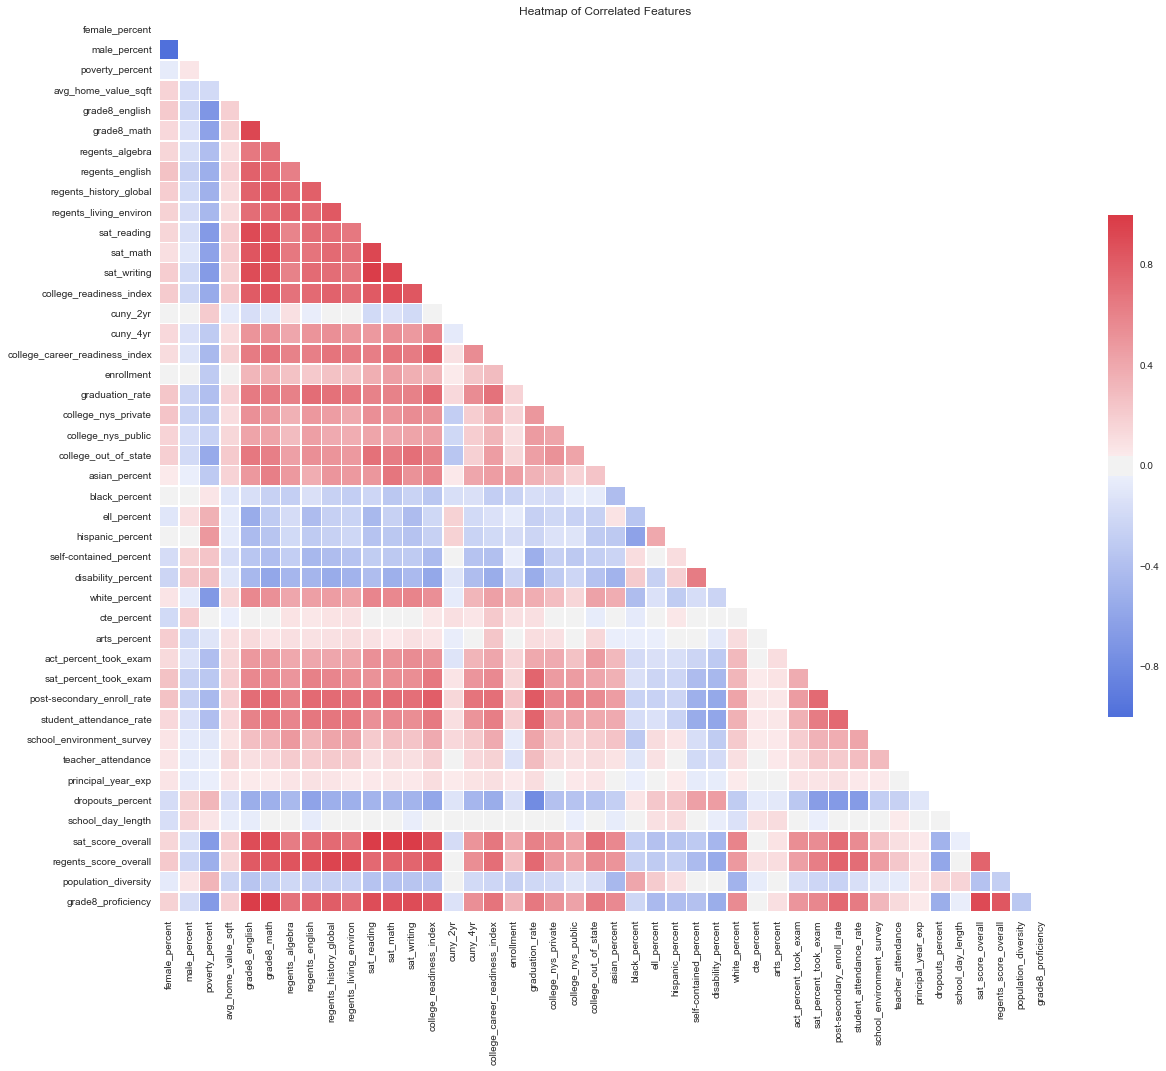

In [40]:
# one more time
# create correlation heatmap - modified from https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.title('Heatmap of Correlated Features')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [41]:
pd.set_option('display.max_columns', None)
data.describe()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,dropouts_percent,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,0.491780,0.508215,0.806972,478.612137,2.426923,2.346013,66.245128,71.905641,65.272821,68.631795,418.854872,425.657436,412.726154,0.290482,0.170895,0.140002,0.415893,643.160000,0.733475,0.072263,0.087678,0.047212,0.090902,0.373058,0.124630,0.442199,0.053180,0.188185,0.076325,0.027720,0.025815,0.084327,0.625680,0.536442,0.869470,0.841588,0.965518,4.882359,0.088694,421.841026,1257.238462,272.055385,0.505767,4.772936
std,0.139324,0.139321,0.156481,316.081895,0.380232,0.389465,6.185564,7.484366,9.368753,7.801491,54.681678,64.338344,57.564551,0.232938,0.089390,0.099359,0.268438,735.987919,0.160871,0.060331,0.061341,0.063481,0.134791,0.254595,0.186013,0.242252,0.056152,0.085164,0.124313,0.115514,0.126932,0.124683,0.201825,0.187358,0.064332,0.057396,0.010711,3.454512,0.074756,28.397811,173.506483,27.917983,0.161500,0.755089
min,0.000000,0.000000,0.141361,154.416667,1.698000,1.860000,52.000000,48.000000,42.000000,49.000000,302.000000,317.000000,284.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.091000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000,0.610000,0.883000,0.100000,0.000000,355.000000,919.000000,213.000000,0.173010,3.600811
25%,0.435556,0.453335,0.744794,348.416667,2.210000,2.095054,62.000000,67.000000,58.000000,64.000000,390.500000,389.000000,383.000000,0.125000,0.119500,0.076000,0.209000,322.500000,0.636000,0.034000,0.046000,0.015000,0.012000,0.195265,0.027477,0.216000,0.006000,0.138661,0.011000,0.000000,0.000000,0.011000,0.506500,0.406500,0.826000,0.801000,0.960000,2.300000,0.037826,405.000000,1160.000000,253.000000,0.384174,4.300000
50%,0.490625,0.509375,0.829295,391.916667,2.340000,2.220000,65.000000,71.000000,64.000000,67.000000,409.500000,410.000000,402.000000,0.221000,0.164000,0.122000,0.365000,426.000000,0.738000,0.058000,0.075000,0.029000,0.035000,0.303000,0.067961,0.457317,0.036000,0.193000,0.023000,0.000000,0.000000,0.040000,0.632000,0.514000,0.878000,0.840000,0.966000,3.900000,0.075228,420.000000,1221.500000,267.000000,0.485865,4.541686
75%,0.546665,0.564444,0.908691,444.083333,2.562491,2.459429,69.000000,76.000000,70.000000,73.000000,432.000000,442.500000,425.000000,0.372000,0.209500,0.173500,0.582500,593.500000,0.851000,0.089500,0.112000,0.048000,0.096225,0.521869,0.134500,0.637000,0.086021,0.241794,0.078523,0.000000,0.000000,0.107000,0.766000,0.656500,0.919000,0.880000,0.972000,7.000000,0.115164,435.000000,1293.500000,287.500000,0.592095,5.000000
max,1.000000,1.000000,1.000000,1861.250000,4.010000,4.170000,94.000000,96.000000,96.000000,95.000000,697.000000,754.000000,693.000000,1.000000,0.784000,0.802000,1.000000,5458.000000,1.000000,0.573000,0.429000,0.497000,0.

In [42]:
data.shape

(975, 46)

In [43]:
data.corr().sort_values(by='graduation_rate', ascending=False)

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,dropouts_percent,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency
graduation_rate,0.236523,-0.236520,-0.391834,0.164581,0.655098,0.647571,0.609504,0.726092,0.698203,0.662992,0.602424,0.603188,0.611327,0.740538,0.137613,0.547968,0.692712,0.168958,1.000000,0.493381,0.470502,0.450399,0.346904,-0.163409,-0.272638,-0.231287,-0.522070,-0.533335,0.373490,0.105197,0.117095,0.398211,0.758937,0.825262,0.773127,0.417369,0.292458,0.112211,-0.787790,0.006484,0.616349,0.749269,-0.205311,0.663889
post-secondary_enroll_rate,0.264758,-0.264744,-0.439283,0.179983,0.721079,0.740512,0.614372,0.734433,0.730531,0.688773,0.691865,0.721296,0.707521,0.801967,0.146800,0.682661,0.708762,0.255135,0.825262,0.587245,0.595741,0.560204,0.460734,-0.247007,-0.251629,-0.232957,-0.515051,-0.569402,0.424187,0.056105,0.060355,0.468205,0.734880,1.000000,0.747423,0.370619,0.215814,0.096135,-0.677795,-0.008202,0.720247,0.770637,-0.257242,0.745052
student_attendance_rate,0.137539,-0.137533,-0.405034,0.132958,0.607459,0.663235,0.590176,0.669458,0.677157,0.656484,0.527842,0.566186,0.543453,0.654453,0.103480,0.512474,0.631379,0.182503,0.773127,0.411712,0.408398,0.398202,0.384571,-0.169737,-0.138684,-0.242277,-0.539302,-0.586859,0.354984,0.054581,0.059999,0.358294,0.633589,0.747423,1.000000,0.416533,0.287254,0.048566,-0.670147,0.038133,0.556604,0.720923,-0.153637,0.647979
sat_percent_took_exam,0.264972,-0.264970,-0.329546,0.188509,0.572163,0.572231,0.505264,0.613321,0.593277,0.541491,0.522887,0.546513,0.544133,0.657024,0.072093,0.506903,0.569472,0.143612,0.758937,0.471127,0.466380,0.411948,0.358341,-0.148059,-0.229220,-0.224963,-0.419802,-0.449647,0.320465,0.041009,0.080935,0.376126,1.000000,0.734880,0.633589,0.348368,0.226369,0.072904,-0.648909,-0.040458,0.547973,0.626778,-0.223409,0.583267
regents_score_overall,0.219466,-0.219452,-0.523219,0.142746,0.820929,0.832239,0.854720,0.876080,0.944598,0.926034,0.745276,0.772229,0.758462,0.814927,0.017445,0.544852,0.712304,0.277363,0.749269,0.472376,0.419983,0.547962,0.509583,-0.264236,-0.307924,-0.275568,-0.423357,-0.547888,0.482369,0.088795,0.112383,0.452684,0.626778,0.770637,0.720923,0.455382,0.227914,0.078052,-0.578794,-0.023712,0.772867,1.000000,-0.275470,0.842644
college_readiness_index,0.204338,-0.204322,-0.550240,0.213965,0.813066,0.847035,0.690506,0.737595,0.780840,0.723454,0.825137,0.884133,0.840795,1.000000,-0.029718,0.587110,0.792754,0.330442,0.740538,0.522476,0.444380,0.605999,0.593281,-0.342543,-0.209991,-0.265198,-0.423129,-0.576831,0.536726,0.058419,0.072884,0.517655,0.657024,0.801967,0.654453,0.389494,0.186380,0.110684,-0.585382,-0.030518,0.866847,0.814927,-0.338807,0.846316
regents_english,0.261099,-0.261097,-0.519286,0.166802,0.785931,0.745347,0.623768,1.000000,0.794308,0.727296,0.718873,0.684566,0.727703,0.737595,-0.049635,0.510785,0.622885,0.223216,0.726092,0.485215,0.447366,0.537319,0.368137,-0.140858,-0.415479,-0.310996,-0.450271,-0.471594,0.449402,0.059810,0.087676,0.406961,0.613321,0.734433,0.669458,0.323292,0.200039,0.092996,-0.606400,-0.067781,0.721834,0.876080,-0.268378,0.780203
regents_history_global,0.197213,-0.197195,-0.505988,0.119642,0.780576,0.805976,0.739380,0.794308,1.000000,0.831142,0.703724,0.741605,0.719116,0.780840,-0.003884,0.538324,0.685102,0.262585,0.698203,0.456462,0.389363,0.514312,0.504132

In [44]:
data.corr().sort_values(by='college_readiness_index', ascending=False)

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,dropouts_percent,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency
college_readiness_index,0.204338,-0.204322,-0.550240,0.213965,0.813066,0.847035,0.690506,0.737595,0.780840,0.723454,0.825137,0.884133,0.840795,1.000000,-0.029718,0.587110,0.792754,0.330442,0.740538,0.522476,0.444380,0.605999,0.593281,-0.342543,-0.209991,-0.265198,-0.423129,-0.576831,0.536726,0.058419,0.072884,0.517655,0.657024,0.801967,0.654453,0.389494,0.186380,0.110684,-0.585382,-0.030518,0.866847,0.814927,-0.338807,0.846316
sat_math,0.101914,-0.101904,-0.615210,0.194858,0.850110,0.889719,0.658012,0.684566,0.741605,0.694411,0.928962,1.000000,0.935757,0.884133,-0.126567,0.534206,0.685268,0.451694,0.603188,0.509409,0.408793,0.634855,0.672646,-0.334432,-0.264808,-0.334978,-0.323514,-0.510787,0.573614,0.033249,0.048997,0.521409,0.546513,0.721296,0.566186,0.273546,0.117444,0.058207,-0.473665,-0.032232,0.974039,0.772229,-0.373452,0.886985
sat_score_overall,0.152775,-0.152763,-0.664103,0.191361,0.901204,0.883097,0.634522,0.721834,0.735362,0.687063,0.986028,0.974039,0.988817,0.866847,-0.175614,0.508268,0.665175,0.403573,0.616349,0.540503,0.425385,0.691655,0.577093,-0.275417,-0.376072,-0.358768,-0.315311,-0.461904,0.597170,0.018453,0.079001,0.539962,0.547973,0.720247,0.556604,0.250889,0.108445,0.053021,-0.486262,-0.040597,1.000000,0.772867,-0.371369,0.909299
grade8_math,0.136068,-0.136056,-0.615376,0.177749,0.924797,1.000000,0.694412,0.745347,0.805976,0.744688,0.849785,0.889719,0.860120,0.847035,-0.097947,0.530040,0.689726,0.360074,0.647571,0.499831,0.426803,0.622518,0.620915,-0.262405,-0.310413,-0.357271,-0.401542,-0.583369,0.526770,0.033082,0.076069,0.495593,0.572231,0.740512,0.663235,0.342930,0.139226,0.042495,-0.512884,-0.033362,0.883097,0.832239,-0.290721,0.981476
grade8_proficiency,0.176779,-0.176770,-0.672611,0.187136,0.980557,0.981476,0.689453,0.780203,0.808778,0.749050,0.895145,0.886985,0.899062,0.846316,-0.131189,0.531695,0.680750,0.349442,0.663889,0.522092,0.435299,0.654547,0.567005,-0.213349,-0.431874,-0.399297,-0.381560,-0.528103,0.559737,0.031907,0.103066,0.501473,0.583267,0.745052,0.647979,0.317276,0.125088,0.044187,-0.530234,-0.048061,0.909299,0.842644,-0.328327,1.000000
sat_writing,0.198973,-0.198961,-0.670950,0.179620,0.904410,0.860120,0.608839,0.727703,0.719116,0.669758,0.983812,0.935757,1.000000,0.840795,-0.196712,0.481861,0.640812,0.366766,0.611327,0.549928,0.429525,0.710298,0.515996,-0.242865,-0.418790,-0.360061,-0.311155,-0.432217,0.597050,-0.004130,0.096407,0.546897,0.544133,0.707521,0.543453,0.242870,0.103982,0.048039,-0.482400,-0.050324,0.988817,0.758462,-0.359370,0.899062
sat_reading,0.155383,-0.155370,-0.677039,0.188834,0.907217,0.849785,0.598201,0.718873,0.703724,0.657959,1.000000,0.928962,0.983812,0.825137,-0.201228,0.476936,0.629738,0.362985,0.602424,0.536743,0.416605,0.699925,0.496499,-0.224744,-0.440846,-0.365201,-0.292284,-0.409639,0.591396,0.023778,0.091531,0.524095,0.522887,0.691865,0.527842,0.218550,0.096453,0.049180,-0.477776,-0.037914,0.986028,0.745276,-0.360644,0.895145
regents_score_overall,0.219466,-0.219452,-0.523219,0.142746,0.820929,0.832239,0.854720,0.876080,0.944598,0.926034,0.745276,0.772229,0.758462,0.814927,0.017445,0.544852,0.712304,0.277363,0.749269,0.472376,0.419983,0.547962,0.509583,-0.264236,-0.307924,-0.275568,-0.42335

In [45]:
data['graduation_rate'].mean()

0.7334748717948746

In [46]:
data['college_readiness_index'].mean()

0.29048205128205157

In [48]:
len(data[data['college_readiness_index']>=data['graduation_rate'].mean()-data['graduation_rate'].std()])/float(len(data))

0.12923076923076923

In [230]:
# schools graduating college-ready students at a rate somewhat consistent with their graduation figures
consistent = data[data['graduation_rate']-data['college_readiness_index']<=.20] 
consistent.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,zip_code,dropouts_percent,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency
DBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.50,3.53,80,91,87,88,601,657,601,0.967,0.044,0.168,0.992,1735,0.975,0.248,0.159,0.195,0.385,0.133,0.002,0.180,0.000,0.043,0.286,0,0,0.262,0.910,0.823,0.952,0.85,0.967,9.0,10002,0.008197,465,1859,346,0.280110,7.03
1501M696,0.598165,0.401835,0.339450,1321.166667,1,3.71,3.65,73,92,83,67,641,634,639,0.974,0.007,0.119,1.000,545,0.974,0.189,0.140,0.497,0.171,0.172,0.000,0.187,0.000,0.011,0.453,0,0,0.357,0.708,0.958,0.958,0.91,0.976,4.8,10002,0.012987,410,1914,315,0.299003,7.36
1502M411,0.596452,0.403548,0.592018,1861.250000,2,3.26,3.29,77,85,87,86,526,592,531,0.981,0.028,0.364,1.000,451,1.000,0.131,0.262,0.103,0.548,0.062,0.002,0.149,0.002,0.100,0.228,0,0,0.276,0.943,0.907,0.975,0.90,0.963,11.2,10010,0.000000,390,1649,335,0.378333,6.55
1502M412,0.551959,0.448041,0.339012,391.916667,2,3.28,3.17,77,71,82,85,550,595,555,0.828,0.016,0.214,0.718,587,0.963,0.103,0.214,0.262,0.276,0.060,0.002,0.155,0.000,0.150,0.460,0,0,0.411,0.798,0.810,0.942,0.89,0.964,8.8,10011,0.000000,410,1700,315,0.315401,6.45
1502M413,0.507714,0.492286,0.371669,1861.250000,2,3.05,2.77,65,83,64,67,533,534,522,0.899,0.122,0.144,0.989,713,0.966,0.156,0.167,0.122,0.144,0.117,0.005,0.304,0.000,0.148,0.359,0,0,0.169,0.899,0.722,0.941,0.88,0.967,7.9,10010,0.000000,395,1589,279,0.255722,5.82


In [239]:
# schools that are graduating college-ready students at the same rate as (or greater than) the NYC average graduation rate (within one standard deviation)
data[data['college_readiness_index']>=data['graduation_rate'].mean()-data['graduation_rate'].std()]

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,zip_code,dropouts_percent,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency
DBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.660000,2.630000,65,75,64,67,428.0,454,445,0.580,0.111,0.144,0.386,666,0.864,0.189,0.156,0.100,0.094000,0.221000,0.018000,0.579000,0.000000,0.234000,0.083000,0.000,0.000,0.216,0.852,0.722,0.938,0.920,0.961,13.8,10009,0.034091,420,1327.0,271,0.399807,5.290000
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.500000,3.530000,80,91,87,88,601.0,657,601,0.967,0.044,0.168,0.992,1735,0.975,0.248,0.159,0.195,0.385000,0.133000,0.002000,0.180000,0.000000,0.043000,0.286000,0.000,0.000,0.262,0.910,0.823,0.952,0.850,0.967,9.0,10002,0.008197,465,1859.0,346,0.280110,7.030000
1501M696,0.598165,0.401835,0.339450,1321.166667,1,3.710000,3.650000,73,92,83,67,641.0,634,639,0.974,0.007,0.119,1.000,545,0.974,0.189,0.140,0.497,0.171000,0.172000,0.000000,0.187000,0.000000,0.011000,0.453000,0.000,0.000,0.357,0.708,0.958,0.958,0.910,0.976,4.8,10002,0.012987,410,1914.0,315,0.299003,7.360000
1502M294,0.508380,0.491620,0.673184,1321.166667,2,2.480000,2.250000,65,70,64,67,411.0,395,387,0.600,0.200,0.063,0.667,358,0.844,0.063,0.263,0.013,0.059000,0.385000,0.042000,0.413000,0.003000,0.260000,0.117000,0.000,0.000,0.022,0.789,0.613,0.863,0.880,0.973,4.9,10002,0.044944,405,1193.0,266,0.335964,4.730000
1502M376,0.576923,0.423077,0.443439,391.916667,2,3.120000,2.810000,70,86,79,77,515.0,518,503,0.750,0.071,0.224,0.470,442,0.990,0.184,0.112,0.214,0.086000,0.199000,0.002000,0.398000,0.007000,0.129000,0.287000,0.000,0.000,0.290,0.960,0.806,0.940,0.920,0.980,2.8,10013,0.000000,420,1536.0,312,0.287770,5.930000
1502M411,0.596452,0.403548,0.592018,1861.250000,2,3.260000,3.290000,77,85,87,86,526.0,592,531,0.981,0.028,0.364,1.000,451,1.000,0.131,0.262,0.103,0.548000,0.062000,0.002000,0.149000,0.002000,0.100000,0.228000,0.000,0.000,0.276,0.943,0.907,0.975,0.900,0.963,11.2,10010,0.000000,390,1649.0,335,0.378333,6.550000
1502M412,0.551959,0.448041,0.339012,391.916667,2,3.280000,3.170000,77,71,82,85,550.0,595,555,0.828,0.016,0.214,0.718,587,0.963,0.103,0.214,0.262,0.276000,0.060000,0.002000,0.155000,0.000000,0.150000,0.460000,0.000,0.000,0.411,0.798,0.810,0.942,0.890,0.964,8.8,10011,0.000000,410,1700.0,315,0.315401,6.450000
1502M413,0.507714,0.492286,0.371669,1861.250000,2,3.050000,2.770000,65,83,64,67,533.0,534,522,0.899,0.122,0.144,0.989,713,0.966,0.156,0.167,0.122,0.144000,0.117000,0.005000,0.304000,0.000000,0.148000,0.359000,0.000,0.000,0.169,0.899,0.722,0.941,0.880,0.967,7.9,10010,0.000000,395,1589.0,279,0.255722,5.820000
1502M414,0.552017,0.447983,0.719745,391.916667,2,3.180000,3.130000,70,87,89,83,530.0,560,522,0.918,0.051,0.354,0.727,471,1.000,0.172,0.152,0.091,0.342000,0.127000,0.006000,0.397000,0.000000,0.076000,0.121000,0.000,0.000,0.182,0.900,0.828,0.948,0.840,0.950,10.0,10011,0.000000,390,1612.0,329,0.305343,6.310000


<table>
	<tbody>
		<tr>
			<td><b>Column Name</b></td>
			<td><b>Description</b></td>
		</tr>
		<tr>
			<td>act_percent_took_exam</td>
			<td>Percentage of students who took the ACT exam (note: scores are not included due to lack of data &lt;50%)</td>
		</tr>
        		<tr>
			<td>arts_percent</td>
			<td>Percentage of students who received an arts endorsement on their diploma</td>
		</tr>
		<tr>
			<td>asian_percent</td>
			<td>Percent of Asian students within school&#39;s population</td>
		</tr>
        		<tr>
			<td>avg_home_value_sqft</td>
			<td>Average price per square footage (condos and co-ops) in USD</td>
		</tr>
		<tr>
			<td>black_percent</td>
			<td>Percent of black students within school&#39;s population</td>
		</tr>
		<tr>
			<td>college_career_readiness_index</td>
			<td>
			<p>Percentage of students who have attained any of the following:</p>

			<p>- Scored 65+ on Algebra II or Math 2, Chemistry, or Physics&nbsp;Regents</p>

			<p>- Scored 3+ on any AP exam or 4+ on any IB exam</p>

			<p>- Earned a grade of &#39;C&#39; or higher on any college-credit bearing course</p>

			<p>- Passed any course certified by the DOE as being &quot;college and career ready&quot;</p>

			<p>- Earned a diploma with a CTE (&#39;Career and Technical Education&#39;) endorsement</p>

			<p>- Earned a diploma with an Arts endorsement</p>

			<p>- Passed an industry-recognized technical assesment</p>
			</td>
		</tr>
		<tr>
			<td>college_nys_private</td>
			<td>Enrollment rate into New York State private universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_nys_public</td>
			<td>Enrollment rate into New York State public universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_out_of_state</td>
			<td>Enrollment rate into out of state universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_readiness_index</td>
			<td>Percentage of students who meet CUNY&#39;s standards of readiness in math (score of 80+ on a math Regents, 480+ on SAT math, 20+ on ACT math, 40 on a CUNY assesment test math 2, or pass granted by the NY State Performance Standards Consortium) or English (score of 75+ on English Regents, 480+ on SAT verbal, 20+ on ACT English, or 70+ on reading and 56+ on writing on the CUNY assesment test)</td>
		</tr>
        		<tr>
			<td>cte_percent</td>
			<td>Percentage of students who graduate with a career technology endorsement on their diploma</td>
		</tr>
		<tr>
			<td>cuny_2yr</td>
			<td>Enrollment rate into 2-year CUNY (City University of New York) schools within six months of graduation</td>
		</tr>
		<tr>
			<td>cuny_4yr</td>
			<td>Enrollment rate into 4-year CUNY (City University of New York) schools within six months of graduation</td>
		</tr>
		<tr>
			<td>disability_percent</td>
			<td>Percent of students with disabilities within school&#39;s population</td>
		</tr>
        		<tr>
			<td>district_admin_code</td>
			<td>Administrative Department of Education district code (special identifier for special needs schools)</td>
		</tr>
                       		<tr>
			<td>dropouts_percent</td>
			<td>Percent of students from cohort who dropped out</td>
		</tr>
		<tr>
			<td>ell_percent</td>
			<td>Percent of English language learner students within school&#39;s population<br />
			(English is not their native language)</td>
		</tr>

		<tr>
			<td>enrollment</td>
			<td>Total student enrollment for school</td>
		</tr>
		<tr>
			<td>female_percent</td>
			<td>Percent of female students within school&#39;s population</td>
		</tr>
		<tr>
			<td>grade8_english</td>
			<td>Average Grade 8 English Proficiency (as determined by state exams)</td>
		</tr>
		<tr>
			<td>grade8_math</td>
			<td>Average Grade 8 Math Proficiency (as determined by state exams)</td>
		</tr>
        		<tr>
			<td>grade8_proficiency</td>
			<td>Sum of Average Grade 8 Math and Average Grade 8 English (as determined by state exams)</td>
		</tr>
		<tr>
			<td>graduation_rate</td>
			<td>Rate of students who graduated high school within four years</td>
		</tr>
		<tr>
			<td>hispanic_percent</td>
			<td>Percent of hispanic students within school&#39;s population</td>
		</tr>
		<tr>
			<td>male_percent</td>
			<td>Percent of male students within school&#39;s population</td>
		</tr>
        		<tr>
			<td>population_diversity</td>
			<td>Diversity feature created by summing the squares of white_percent, black_percent, hispanic_percent, and asian_percent; note that a higher number indicate a more homogenous population, while a smaller number represents a more diverse student body</td>
		</tr>
		<tr>
			<td>post-secondary_enroll_rate&nbsp;</td>
			<td>Rate of students who enrolled in post-secondary education within six months of graduation</td>
		</tr>
		<tr>
			<td>poverty_percent</td>
			<td>Percent of students within school&#39;s population who live in poverty (as determined by free lunch index, temporary housing, ratio of subsidiaries given)</td>
		</tr>
        		<tr>
			<td>principal_year_exp</td>
			<td>Years of experience current principal has had at school</td>
		</tr>

        		<tr>
			<td>regents_algebra</td>
			<td>Average score on integrated algebra Regents exam (passing score of 65 on any math exam is required for graduation)</td>
		</tr>

 
		<tr>
			<td>regents_english</td>
			<td>Average score on English Regents exam&nbsp;(passing score of 65 is required for graduation)</td>
		</tr>

        		<tr>
			<td>regents_history_global</td>
			<td>Average score on global history Regents exam (passing score of 65 on any history exam is required for graduation)</td>
		</tr>


        <tr>
        			<td>regents_living_environ</td>
			<td>Average score on science living environment Regents exams (passing score of 65 on any science exam is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_overall</td>
			<td>Sum of all average reported Regents scores from each school (I created this)</td>
		</tr>
  
		<tr>
			<td>sat_math</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>
		<tr>
			<td>sat_percent_took_exam</td>
			<td>Percentage of students who took the SAT exam</td>
		</tr>
		<tr>
			<td>sat_reading</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>
		<tr>
			<td>sat_score_overall</td>
			<td>Average score on SAT Math Exam (out of 2400)</td>
		</tr>
		<tr>
			<td>sat_writing</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>

        		<tr>
			<td>school_day_length</td>
			<td>Length of schoolday (in minutes). Created using start and end times.</td>
		</tr>
        	<tr>
			<td>school_desc</td>
			<td>Short description of school type</td>
		</tr>
        	<tr>
			<td>school_environment_survey</td>
			<td>Survey responses in percentage positive combined from students, teachers, and parents regarding school culture/environment</td>
		</tr>
        		<tr>
			<td>self-contained_percent</td>
			<td>Percentage of students in a self-contained learning environment; typically, for special needs students</td>
		</tr>
		<tr>
			<td>student_attendance_rate</td>
			<td>Rate of student attendance throughout the year</td>
		</tr>
		<tr>
			<td>teacher_attendance</td>
			<td>Rate of teacher attendane throughout the year</td>
		</tr>
		<tr>
			<td>vocational_prog</td>
			<td>Enrollment rate into vocational programs within six months of graduation</td>
		</tr>
		<tr>
			<td>white_percent</td>
			<td>Percent of white students within school&#39;s population</td>
		</tr>
		<tr>
			<td>zip_code</td>
			<td>School&#39;s zip code</td>
		</tr>
	</tbody>
</table>

